# Lesson 5: 
## An Intro to Scientific Computing and Data Visualization 

## 5.3 Introduction to Matplotlib

We start by importing the libraries that we use for this lesson.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In our first example we will plot the function $y=x^2$ for the values $x=0,1,2,3,4,5$.

We prepare our data by defining two lists:

In [3]:
x=[0,1,2,3,4,5]  #Independent variable
y=[0,1,5,9,16,25] #Dependent variable

We now plot as follows:

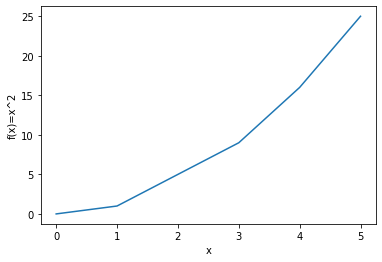

In [7]:
plt.plot(x,y) #plt.plot(x,y) takes lists/arrays x and y and plots the data
plt.xlabel('x') # label the x-axis with the string provided
plt.ylabel('f(x)=x^2') # label the y-axis wiht the string provided.
plt.show() # show the plot

Let us understand how the previous lines of code work. First, `plt.plot(x,y)` reads and automatically plots the data. Functions `plt.xlabel()` and `plt.ylabel()` each take one string as input and use it to label the $x$- and $y$-axis, respectively. Finally, `plt.show()` shows the plot in our screen. 

Using in Matplotlib is like preparing a cake- *We can add as many layers as we like*. For instance,  we add the graph with the cubes of the same $x$-values as follows:

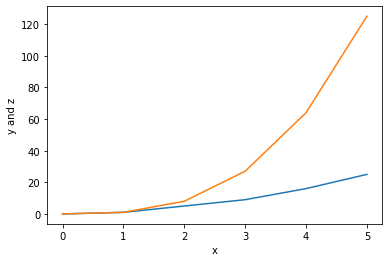

In [10]:
z=[0,1,8,27,64,125]
plt.plot(x,y) # Plot each (x,y) value
plt.plot(x,z) # Plot each (x,z) value
plt.xlabel('x')
plt.ylabel('y and z')
plt.show()

Matplotlib automatically adjusts the axes to fit our data. Also, by default, `plt.plot()` generates a *line graph* connecting contiguous $(x,y)$-values. This can be changed by giving a third string argument to the `plt.plot` encoding our desired layout:

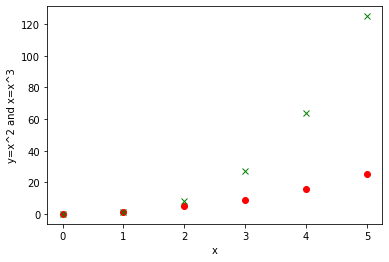

In [15]:
plt.plot(x,y,'ro') # r=Red, o=markers are points.
plt.plot(x,z,'gx') # g=Green, x=markers are xs.
plt.xlabel('x') 
plt.ylabel('y=x^2 and x=x^3')
plt.show()

The third string argument for the  `plt.plot` function encodes the display as follows:

- First character sets the color. For instance, `'r'` stands for *red* and `'g'` for *green*.
- Second character sets the marker. For instance, `'o'` stands for *point plot* and `'x'` for using *crosses*.

For a full list of colors and markers styles we refer to 

https://github.com/matplotlib/cheatsheets/raw/master/cheatsheets-1.png

**Quiz:** Construct the following plot:

PLOT IMAGE HERE

In Matplotlib, a plot can be build in different ways. For instance, the next method is more readable at the cost of being lengthier. 

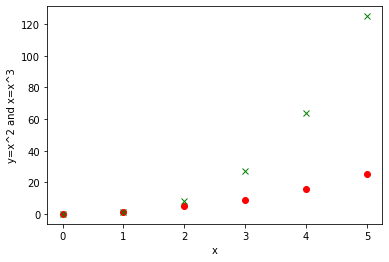

In [15]:
plt.plot(x,y,color='red',marker='o',linestyle='')
plt.plot(x,z,color='green',marker='x',linestyle='')
plt.xlabel('x')
plt.ylabel('y=x^2 and x=x^3')
plt.show()

**Quiz:** Why the previous plot needs the linestyle argument?

It is good practice to add a lengend indicating each variable.  To add a legend, we provide a  `label` argument to each `plt.plot()` and we add a `plt.legend()` layer. A title can also be added using `plt.title()`.

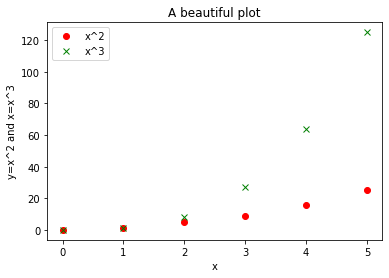

In [14]:
plt.plot(x,y,color='red',marker='o',linestyle='',label='x^2')
plt.plot(x,z,color='green',marker='x',linestyle='',label='x^3')
plt.xlabel('x')
plt.ylabel('y=x^2 and x=x^3')
plt.legend()
plt.title('A beautiful plot')
plt.show()

## 5.3  1D array creation in NumPy


Entering five data points manually is easy. However, in real life we either generate data using a computer or we obtain it from an external source. In this section we will see how we can use NumPy to create data. Afterwards we will see how to import data from a file.

### 5.3.1 Introduction to NumPy arrays

NumPy has the `ndarray` datatype which is very similar to a Python list. We will call them *arrays* for simplicity.

In [18]:
nparray=np.array([1,2,3.1416,4,5])

Many methods that work for Python lists also work for arrays. For instance, we can read a particular entry and slice a sublist as follows:

In [19]:
print(nparray[2]) # read entry
print(nparray[2:]) # slice

3.1416
[3.1416 4.     5.    ]


We can also assign new values.

In [20]:
nparray[2]=3
print(nparray)

[1. 2. 3. 4. 5.]


We can even loop through their elements.

In [9]:
for element in array:
    print(element)

1.0
2.0
3.0
4.0
5.0


However, not all that works for lists works for arrays. For instance, we cannot concatenate arrays having entries of different types. 

In [22]:
# Python method for concatenating two lists
a=[1,2,3]
b=['four','five','six']
a+b

[1, 2, 3, 'four', 'five', 'six']

In [23]:
# NumPy method for concatenating two arrays
a=np.array([1,2,3])
b=np.array(['four','five','six'])
np.concatenate(a,b)


TypeError: only integer scalar arrays can be converted to a scalar index

Indeed, even if you try the same Python method with arrays of the same type, you may obtain an unexpected result:

In [19]:
a=np.array([1,2,3])
b=np.array([4,5,6])
a+b

array([5, 7, 9])

Ok, so *why should we use arrays instead of lists?* Simply because NumPy arrays are more efficient for performing numerical computations. But as Uncle Ben from Spider-Man said: *With great power comes great responsibility*, that is, NumPy numeric power comes at the cost of having less flexibility compared to lists. To learn more about the nuances of NumPy arrays look at  the  bedside book
https://jakevdp.github.io/PythonDataScienceHandbook/.

### 5.3.2 Be careful with types

NumPy arrays require a careful approach when dealing with types. Each array has an assigned type that can be seen using the `.dtype` attribute:


In [21]:
int_array=np.array([0,1,2,3,4])
print(int_array.dtype)

int64


In [20]:
float_array=np.array([3.1416, 1.4142,2.7182])
print(float_array.dtype)

float64


In [77]:
boolean_arr=np.array([True,False, False, True])
print(boolean_arr.dtype)

bool


Types `int64`, `float64`, and `bool` are integer, float and boolean, respectively. Although arrays can deal with many more types (https://numpy.org/devdocs/user/basics.types.html) we will restrict ourselves to these three types.
 We remark that when we create an array, NumPy guesses its type depending on the entries. We can also specify the type of an array by adding the `dtype` argument to  `np.array`:

In [24]:
floaty=np.array([0,1,2,3,4],dtype='float64')
print(floaty.dtype)

float64


### 5.3.3 Arithmetic and 1D arrays

NumPy arrays have the advantage that we can perform fast arithmetic operations of their elements:

In [25]:
a=np.array([1,2,3]) #create a
print(a+10) # add 10 to all elements

[11 12 13]


In [26]:
print(2*a) # multiply all elements by 2

[2 4 6]


In [75]:
print(a/2) # divide all elements by 2

array([0.5, 1. , 1.5])

*Element-wise* operations are also possible:

In [87]:
a=np.array([1,2,3]) 
b=np.array([4,5,6])

In [84]:
#element-wise sum
print(a+b)

[5 7 9]


In [85]:
#element-wise product (also known as dot product)
print(a*b)

[ 4 10 18]


Even rising all the entries  to a given power:

In [89]:
a**2

array([1, 4, 9])

### 5.3.4 Creating 1D arrays from NumPy functions

Here we enlist a few handy NumPy methods for creating arrays:

#### Integer arrays

 **`np.zeros(length,dtype)`:** Generates an array full of zeroes of length `length` and type `dtype` (last argument is optional). 

In [27]:
print(np.zeros(10) )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


`np.ones(length,dtype)`: Same as before but it fills with ones instead.

In [28]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


**`np.arange(n)`:** Similar to Python's `range` function,  `np.arange(n)` creates an array of numbers from `0` to `n-1`.

In [29]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Also `start_value`,  `stop_value` and `step_size` can be specified as:
```python
np.arange(start_value,stop_value,step_size)
```

In [26]:
a=np.arange(5,15,2)
print(a)

[ 5  7  9 11 13]


**`np.random.randint(a, b, size)`:** returns random integers from the interval $[a,b)$. The `size` argument indicates the length of the output array.

In [27]:
np.random.randint(3,10,8)

array([8, 8, 6, 3, 9, 4, 6, 7])

**Quiz:** Build a function called `dice_roller(n)` that prints the sum of `n` dice.

#### Float arrays

**`np.arange`:** This method also can  be used to produce float arrays. 

In [23]:
float_array=np.arange(0.,1.,0.1)
print(float_array)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In the previous line we generated an array of floats from `0` to `1` where any two consecutive values are at distance `0.1`.

Indeed, `np.arange` can be used for drawing graphs of mathematical functions. For instance, suppose that we are plotting $y=x^2$ and $z=x^3$ in the interval $[-1,1]$. For this we subdivide  $[-1,1]$ into a fine array of points as follows:

In [24]:
x=np.arange(-1.,1.,0.01)

Then, we compute the values of $y$ and $z$ on these points:

In [93]:
y=x**2
z=x**3

Finally, we plot:

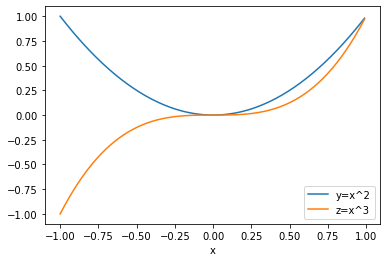

In [94]:
plt.plot(x,y,label='y=x^2')
plt.plot(x,z,label='z=x^3')
plt.xlabel('x')
plt.legend()
plt.show()

**`np.linspace(start,stop,num)`:** This method gives an alternative way to subdivide an interval. It produces a list of evenly spaced floats from  `start` to `stop`. The parameter `size`  specifies the number of points considered.

For instance,  to plot  $y=sin(x)$ in the interval $[-4\pi,4\pi]$, we generate 100 evenly spaced points in that interval as follows.

In [29]:
x=np.linspace(-4*np.pi, 4*np.pi,100)

Then, compute $sin(x)$ in each point.

In [30]:
y=np.sin(x)

We note that `np.sin(x)` reads as computing $\sin(\cdot)$ for each value inside the vector $x$. This is called a *vectorized operation*, and we will learn about them in Section XX. 

Now we plot.

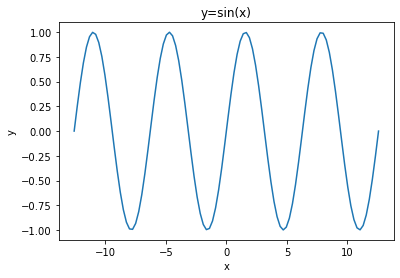

In [31]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=sin(x)')
plt.show()

**`np.random.random(size)`:** Produces an array of floats from the interval $[0,1)$ uniformly at random. The output is an array of length `size`.

In [31]:
np.random.random(10)

array([0.19906855, 0.01870871, 0.19933042, 0.15257168, 0.08917093,
       0.29385325, 0.93009353, 0.96751771, 0.16072658, 0.62822141])

**`np.random.normal(mean,sd,size)`:** Produces an array of floats by sampling from a normal (Gaussian) distribution with mean `mean` and standard deviation `sd`. 

In [35]:
a=np.random.normal(0,1,100)
print(a)

[-0.97785031 -1.27639891  0.42962805  0.2742907  -0.50693727  1.06298529
 -1.37852721  1.26461198 -2.17766784  1.93556304 -0.73232642 -0.30089565
  0.1534186   0.44890325  0.70598624 -0.00373406  2.28129452  1.95523216
  0.75420332 -0.04624752 -1.636484    0.2336719   2.18681512 -0.9923656
  0.91218458  0.39507858  0.61554494 -0.81528702  0.39345616 -1.31648761
  0.10882198 -0.78552259 -0.15880184 -1.07596463  0.02332101  0.04284253
 -0.07505592  0.39639932 -0.54158263 -0.18521147  0.4535198  -1.33660827
 -0.01970657  0.68955628 -2.00705784 -1.2104793  -0.07506019 -1.91472447
 -0.65970918  1.33251967  0.90755571  0.7146083  -0.26466077  0.21444684
  0.42058721 -0.30824462 -0.65673985  0.13054311 -0.60053206 -0.09607779
  0.28270215 -1.17261525  0.99855593  0.35881772  0.30370542  1.04869256
 -0.26041953 -0.68106393  0.5687361   1.52117254  0.72824636 -1.01131577
  0.30465261  1.0549992   0.57762104  0.5970439   1.40261446 -0.09747743
  1.23313612 -1.23909317 -1.06732017  1.1822269  -1.

We can indeed "verify" that our data comes from a normal distribution by plotting a histogram with the `hist` function:

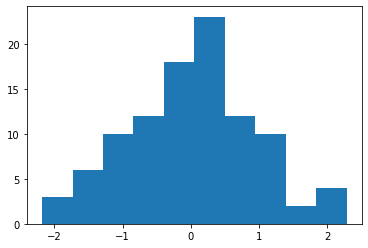

In [36]:
plt.hist(a)
plt.show()

### 5.5.1 Reading data from a CSV file


In this section we will learn how to load data from a file using Pandas. Pandas is a Python library  for data analysis based on NumPy.  Pandas offer great tools for working with spreadsheets among other amenities. In this lesson we will only use Pandas for loading data.

We will load data into an array from dataset containing the Airbnb listings in Vienna. This dataset was compiled on 16 June, 2020 by Murray Cox in the *Inside Airbnb project*. You can find the dataset in the B5 folder as  `airbnb_data.csv` file. The ".csv" file extension means Comma Separated Value and can be opened by most programs dedicated to work with spreadsheets. 

We start by importing Pandas using its conventional alias `pd`:

In [32]:
import pandas as pd

Then we load the csv file with Pandas `np.read_csv` function that takes the file name/location as an argument:

In [33]:
airbnb_df=pd.read_csv("airbnb_data.csv")

Now `airbnb_df` contains a "spreadsheet" saved as a Pandas object called *DataFrame*. We can take a glimpse to such table by using the `.head()` method.

In [39]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15883,b&b near Old Danube river,62142,Eva,NaN,Donaustadt,48.24262,16.42767,Hotel room,85,1,11,2020-02-19,0.17,4,350
1,38768,central cityapartement- wifi- nice neighbourhood,166283,Hannes,NaN,Leopoldstadt,48.21823,16.37926,Entire home/apt,65,3,313,2020-03-04,2.78,3,161
2,40625,"Near Palace Schönbrunn, Apt. 1",175131,Ingela,NaN,Rudolfsheim-Fnfhaus,48.18434,16.32701,Entire home/apt,130,1,153,2020-01-04,1.27,15,347
3,51287,little studio- next to citycenter- wifi- nice ...,166283,Hannes,NaN,Leopoldstadt,48.21851,16.37781,Entire home/apt,60,3,296,2020-04-30,2.59,3,163
4,70568,apartment2rent - UNO City - Danube,358163,Georg,NaN,Donaustadt,48.22224,16.42460,Entire home/apt,59,3,10,2016-10-03,0.09,5,365


To load the price column indexed by `"price"`, we do the following:

In [43]:
airbnb_prices=airbnb_df['price'].values 

Now `prices` is a NumPy array containing the values of Vienna's Airbnb listings.

In [44]:
print(airbnb_prices)

[ 85  65 130 ...  30  25  43]


**Quiz:** Figure out how to obtain the average, maximum value and minimum values of `airbnb_prices`.